In [201]:
# Importing the pandas library
# https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart-disease-uci.zip/1

import pandas as pd

In [202]:
# Importing the data into pandas dataframe

data = pd.read_csv("heart.csv")

In [203]:
# Checking the sahpe of the dataframe

data.shape

(303, 14)

In [204]:
# Checking the global information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [205]:
# Change the data type for the sex and target

data[['sex', 'target', 'thal', 'cp', "restecg", "fbs", "ca", "exang", 'slope']] = data[['sex', 'target', 'thal', 'cp', "restecg", 'fbs', "ca", "exang", 'slope']].astype('category')

In [206]:
# Checking the data types after assigning sex and target to categorical variables

data.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [207]:
# Checking the first five rows of the data frame

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [208]:
# Renaming the columns for better clarity
data.rename(columns = {'cp': 'chestpain', 'trestbps': 'restingbp', 'fbs':'fastblooddsug', 
                       'exang':'angina', 'oldpeak': 'exinduced_depression', "thalach": 'max_heartrate', 
                       "ca": 'numofmajorvessels'}, inplace = True)

In [209]:
# Coverting the numerical values to strings for sex variable
sex_code = {0:'Female', 1:'Male'}
data.sex = data['sex'].map(sex_code)

In [210]:
# Coverting the numerical values to strings for fasting blood pressure variable
fastblooddsug_code = {0:'Normal', 1:'High'}
data.fastblooddsug = data['fastblooddsug'].map(fastblooddsug_code)

In [211]:
# Coverting the numerical values to strings for restecg variable
restecg_code = {0:'Normal', 1:'Abnormal', 2: 'Very Abnormal'}
data.restecg = data['restecg'].map(restecg_code)

In [212]:
# Coverting the numerical values to strings for exercise induced angina variable
angina_code = {0:'No', 1:'Yes'}
data.angina = data['angina'].map(angina_code)

In [213]:
# Coverting the numerical values to strings for target variable
target_code = {0:'No Disease', 1:'Disease'}
data.target = data['target'].map(target_code)

In [214]:
# Coverting the numerical values to strings for exercise induced angina variable
slope_code = {0:'Upsloping', 2:'Flat', 3:'DownSloping'}
data.slope = data['slope'].map(slope_code)

In [215]:
# Coverting the numerical values to strings for exercise induced angina variable
chestpain_code = {0:'Aymptomic', 1:'Non Anginal', 2:'Atypical Angina', 3: 'Typical Angina'}
data.chestpain = data['chestpain'].map(chestpain_code)

In [216]:
data.chestpain.unique()

array(['Typical Angina', 'Atypical Angina', 'Non Anginal', 'Aymptomic'],
      dtype=object)

In [217]:
data.head()

,age,sex,chestpain,restingbp,chol,fastblooddsug,restecg,max_heartrate,angina,exinduced_depression,slope,numofmajorvessels,thal,target
0,63,Male,Typical Angina,145,233,High,Normal,150,No,2.3,Upsloping,0,1,Disease
1,37,Male,Atypical Angina,130,250,Normal,Abnormal,187,No,3.5,Upsloping,0,2,Disease
2,41,Female,Non Anginal,130,204,Normal,Normal,172,No,1.4,Flat,0,2,Disease
3,56,Male,Non Anginal,120,236,Normal,Abnormal,178,No,0.8,Flat,0,2,Disease
4,57,Female,Aymptomic,120,354,Normal,Abnormal,163,Yes,0.6,Flat,0,2,Disease


In [218]:
# Checking to see if there are any null values

data.isnull().sum()

age                       0
sex                       0
chestpain                 0
restingbp                 0
chol                      0
fastblooddsug             0
restecg                   0
max_heartrate             0
angina                    0
exinduced_depression      0
slope                   140
numofmajorvessels         0
thal                      0
target                    0
dtype: int64

In [219]:
# importing the vidualization libraries

import seaborn as sns
import matplotlib.pyplot as plt    

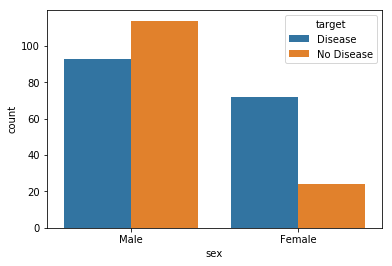

In [220]:
# Visualizing the number of observations by sex

sns.countplot(x = 'sex', data = data, hue = 'target')
plt.show()

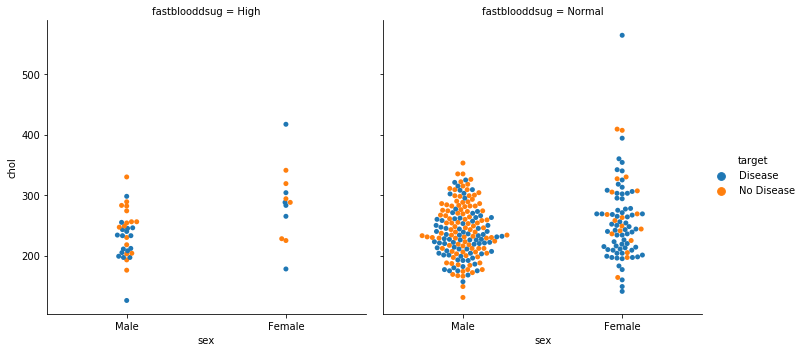

In [221]:
# Box plot looking at distribution of cholesterol levels by target using fasting blood sugar as column variable

sns.catplot(x = 'sex', y = 'chol', data = data, kind = 'swarm', hue = 'target', col = 'fastblooddsug')
plt.show()

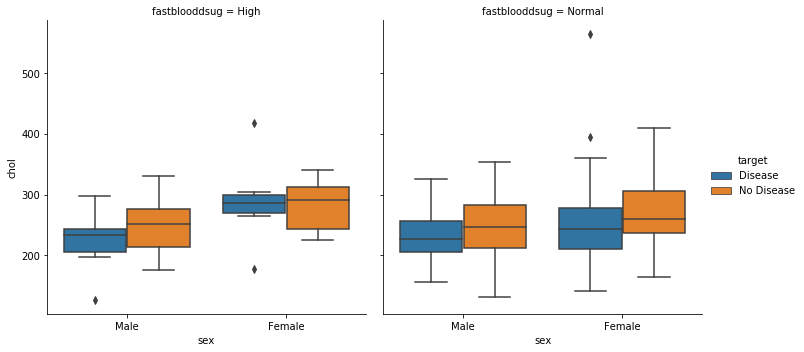

In [222]:
# Box plot looking at distribution of cholesterol levels by target using fasting blood sugar as column variable

sns.catplot(x = 'sex', y = 'chol', data = data, kind = 'box', hue = 'target', col = 'fastblooddsug')
plt.show()

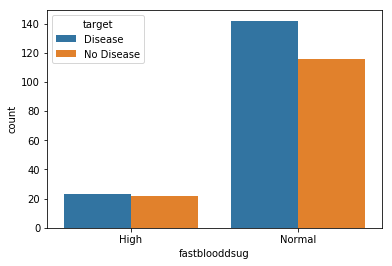

In [223]:
# Over all there are equal number of people with and without disease for when separated the data by fasting blood sugar level

sns.countplot(x = 'fastblooddsug', data = data, hue = 'target')

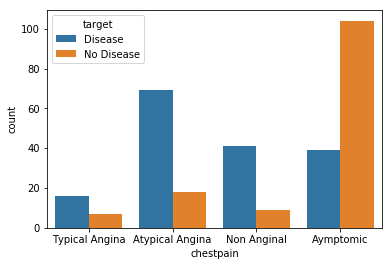

In [224]:
# Bar graph showing number of people with chestpain and furthur grouped into people having disease and no disease

sns.countplot(x = 'chestpain', data = data, hue = 'target')

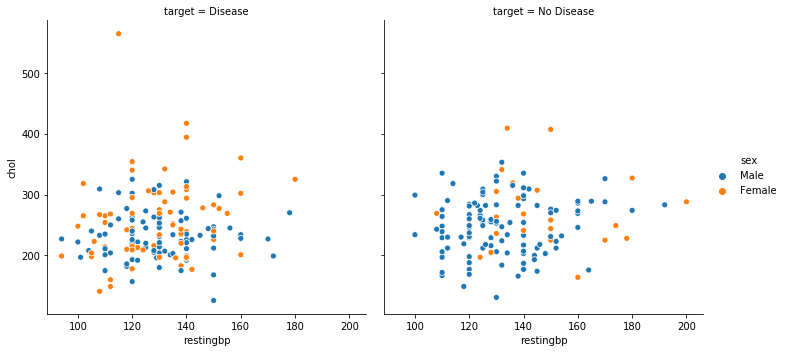

In [225]:
# Scatter plot looking at the relation between the resting blood pressure and cholesterol levels with target as column variable

sns.relplot(x = 'restingbp', y = 'chol', data = data, hue = "sex", kind = 'scatter', col = 'target')
plt.show()

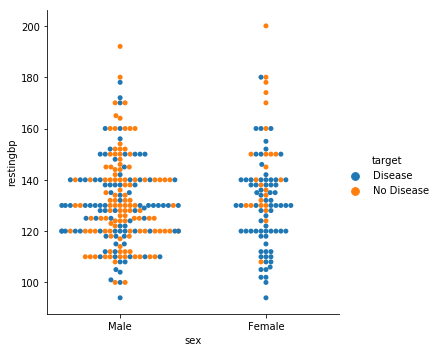

In [226]:
# Scatter plot looking at the relation between the resting blood pressure and cholesterol levels with target as column variable

sns.catplot(x = 'sex', y = 'restingbp', data = data, kind = 'swarm', hue = 'target')
plt.show()

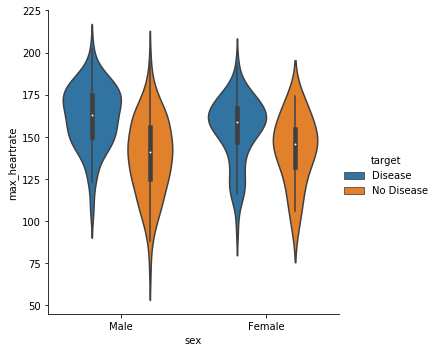

In [227]:
sns.catplot(x = 'sex', y = 'max_heartrate', data = data, kind = 'violin', hue = 'target')
plt.show()

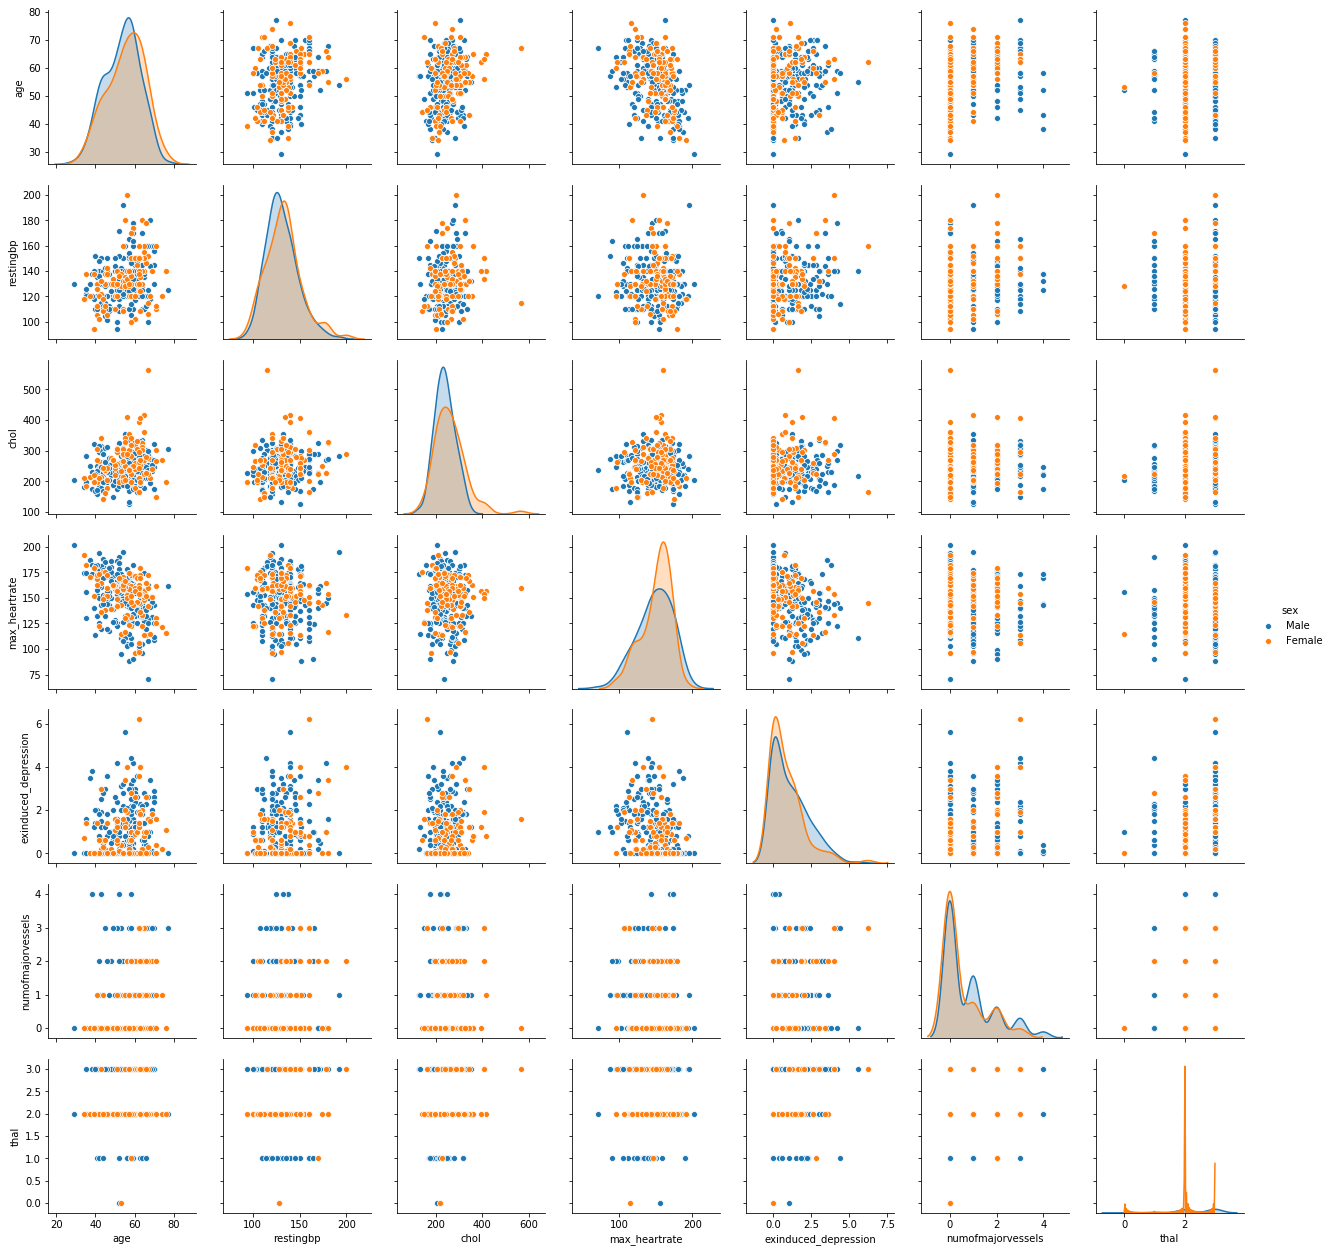

In [228]:
# Pair plot across all variables

sns.pairplot(data, hue = 'sex')

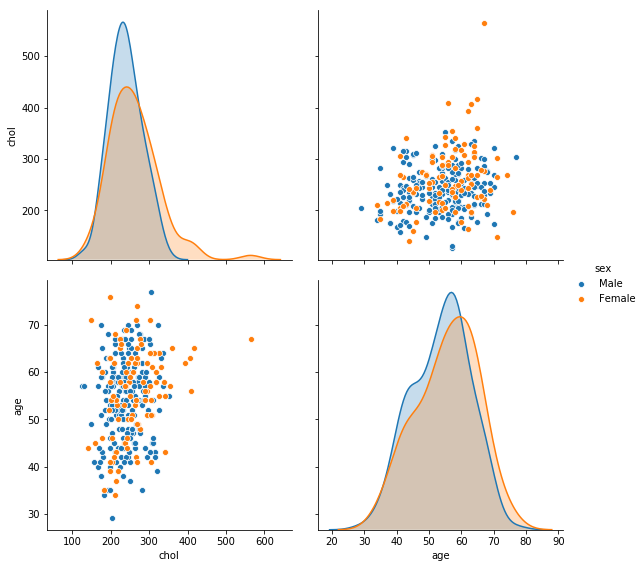

In [229]:
# Pair plot for cholesterol and age

sns.pairplot(data, height = 4, vars=['chol', 'age'], hue = 'sex')

In [230]:
#-----------------------------------------MODEL BUILDING---------------------------------------------------------------

In [231]:
# -----------------------------------------RANDOM FORESTS--------------------------------------------------------------

In [232]:
import pandas as pd

# Importing the data into pandas dataframe

data = pd.read_csv("heart.csv")

In [233]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [234]:
# Change the data type for the sex and target

data[['sex', 'target', 'thal', 'cp', "restecg", "fbs", "ca", "exang", 'slope']] = 
data[['sex', 'target', 'thal', 'cp', "restecg", 'fbs', "ca", "exang", 'slope']].astype('category')

In [235]:
# Getting the X and y values from the dataframe

X = data.iloc[:, :-1]
y = data.iloc[:, 13]

In [236]:
# Importing the test and train split library

from sklearn.model_selection import train_test_split

In [237]:
# Splitting the dataset into test and train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [238]:
# Scaling the variables using standard scaler object

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [239]:
# Fitting the logistic regression on the test and training set

# Fitting the logistic regression on the test and training set

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = 'entropy', n_estimators = 5, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [240]:
# Getting the predictions for the X_test
y_pred = classifier.predict(X_test)

In [241]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  4],
       [ 6, 26]])

In [242]:
# Calculating area under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.8372844827586207

In [243]:
# Calculating the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.81      0.86      0.83        29
          1       0.87      0.81      0.84        32

avg / total       0.84      0.84      0.84        61



In [244]:
# -----------------CR0SS VALIDATION------------------------------------------------------

In [245]:
# Calculating the accuracies from 3 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,  y = y_train, n_jobs = -1, cv = 5)

In [246]:
accuracies.mean()

0.7937599507888262

In [247]:
#--------------------IDENTIFYING THE IMPORTANT FEATURES, SUBSET THE DATA AND FIT TO THE MODEL----------------------------

In [248]:
# Getting the importance of each feature

importances = classifier.feature_importances_
importances

array([0.08218442, 0.03480436, 0.08000933, 0.07044338, 0.10628657,
       0.01792918, 0.03268549, 0.14595333, 0.10506854, 0.07832296,
       0.0215854 , 0.12283203, 0.10189503])

In [249]:
features = []
for i in importances:
    if i >= 0.1:
        features.append(i)

In [250]:
# Sorting the features by their importance
import numpy as np

indices = np.argsort(features[::-1])
indices

array([0, 2, 4, 1, 3])

In [251]:
# Getting the column names form the indices identified above

colname = data.columns[indices]
colname

Index(['age', 'cp', 'chol', 'sex', 'trestbps'], dtype='object')

In [252]:
# Getting the X and y values from the dataframe

data_sub  = data[['age', 'cp', 'chol', 'sex', 'trestbps','target']]

data_sub.head()

,age,cp,chol,sex,trestbps,target
0,63,3,233,1,145,1
1,37,2,250,1,130,1
2,41,1,204,0,130,1
3,56,1,236,1,120,1
4,57,0,354,0,120,1


In [253]:
X_sub = data_sub.iloc[:, :-1]
y_sub = data_sub.iloc[:, 5]

In [254]:
# Splitting the dataset into test and train split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_sub, y_sub, test_size = 0.2, random_state = 42)

In [255]:
# Scaling the variables using standard scaler object

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Xs_train = sc_X.fit_transform(Xs_train)
Xs_test = sc_X.transform(Xs_test)

In [271]:
# Fitting the random forests classification on the test and training set

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 42, oob_score = True)
classifier.fit(Xs_train, ys_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [272]:
# Getting the predictions for the X_test
ys_pred = classifier.predict(Xs_test)

# Calculating area under the curve
from sklearn import metrics
metrics.roc_auc_score(ys_test, ys_pred)

0.8561422413793104

In [273]:
# Calculating out of bag error for the random forest classifier

classifier.oob_score_

0.7066115702479339

In [258]:
#-------------------------Grid Search Full Data Set--------------------------------------------------------------------

In [259]:
# Using Grid Search with Cross Validation to improve the model

from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [1, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [260]:
# Getting the best parameters from the grid search

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 10}

In [261]:
# Getting the predictions for the X_test after efining the model with grid search

y_pred = CV_rfc.predict(X_test)

In [262]:
# Calculating area under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.8825431034482758

In [263]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  5],
       [ 2, 30]])

In [264]:
# Calculating the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.92      0.83      0.87        29
          1       0.86      0.94      0.90        32

avg / total       0.89      0.89      0.88        61



In [265]:
# ------------------VALIDATING GRID SEARCH OUTPUT ON FULL DATASET------------------------------------------------------

In [266]:
# Classifying the data using a random forest classifier after feeding in the optimized parameters from the grisd search

classifier = RandomForestClassifier(criterion = 'gini', n_estimators = 10, random_state = 42, max_features = 'auto', max_depth = 4) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
auc = metrics.roc_auc_score(y_test, y_pred) 
print(auc)

0.8825431034482758


In [194]:
#-------------------PERFORMING GRID SEARCH ON THE FEATURE IMPORTANCE BASED ISOLATED DATASET------------------------

In [195]:
# Using Grid Search with Cross Validation to improve the model

param_grid = { 
    'n_estimators': [1, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CVs_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CVs_rfc.fit(Xs_train, ys_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [196]:
# Getting the best parameters from the grid search

CVs_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 10}

In [197]:
# Getting the predictions for the X_test after efining the model with grid search

ys_pred = CVs_rfc.predict(Xs_test)

In [198]:
# Calculating area under the curve
from sklearn import metrics
metrics.roc_auc_score(ys_test, ys_pred)

0.8421336206896552

In [199]:
#--------------------------VALIDATING THE GRID SEARCH OUTPUT OF FEATURE IMPORTANCE DATASET-----------------------------

In [200]:
# Classifying the data using a random forest classifier after feeding in the optimized parameters from the grisd search

classifier = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 42, max_features = 'auto', max_depth = 7) 
classifier.fit(Xs_train, ys_train) 
ys_pred = classifier.predict(Xs_test) 
auc = metrics.roc_auc_score(ys_test, ys_pred) 
print(auc)

0.8421336206896552
